In [4]:
# 解析模型训练时生成的"*.log"文件
#（1）画出loss曲线
#（2）画出lr变化曲线

# 直接画在 Jupyter 上的图比较小，可以直接拷贝到本地上运行

In [1]:
import os
import pdb
import matplotlib.pyplot as plt

In [2]:
# working dir
wd = '/mnt/lvmhdd/tanfulun/workspaces/Project/eval_yolo_detection'

# 获取 *.log 文件路径
training_log_file_path = os.path.join(wd,'results','logs','goodsid.log')

# 读取文件信息
lgf = open(training_log_file_path,'r')
lines = lgf.readlines()
lgf.close()

In [3]:
# information
batch_num = 0
batch_loss = 0
avg_loss = 0
lr = 0

batch_num_list = []
batch_loss_list = []
avg_loss_list = []
lr_list = []

# parse info
cnt = 0
for line in lines:
    cnt = cnt+1
    if line[0] is '#':
        info_list = line.strip().split(',')
        batch_num = int(info_list[0].split(':')[1])
        batch_loss = float(info_list[1].split(':')[1])
        avg_loss = float(info_list[2].split(':')[1])
        lr = float(info_list[3].split(':')[1])

        #
        batch_num_list.append(batch_num)
        batch_loss_list.append(batch_loss)
        avg_loss_list.append(avg_loss)
        lr_list.append(lr)

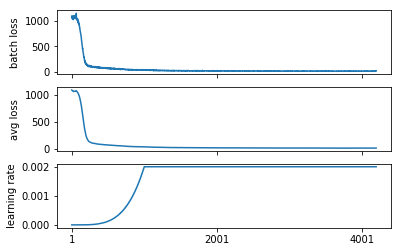

In [4]:
# plot
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True)

ax1.set_ylabel('batch loss')
ax1.plot(batch_loss_list)

ax2.set_ylabel('avg loss')
ax2.plot(avg_loss_list)

ax3.set_ylabel('learning rate')
ax3.plot(lr_list)

#
num = len(batch_num_list)
xticks = range(0,num,1000)
xticklabels = []
for itm in xticks:
    xticklabels.append(batch_num_list[itm])

ax3.set_xticks(xticks)
ax3.set_xticklabels(xticklabels)


#plt.plot(batch_loss_list)
plt.show()